1. Descriptive Statistics
Calculate summary statistics for numerical features such as price,
minimum_nights, maximum_nights, number_of_reviews, and
review_scores_rating. Understand the central tendency, dispersion, and
distribution of these variables.

In [10]:
import pandas as pd

# Load the CSV file
file_path = './data/listings.csv'   # boston
data = pd.read_csv(file_path)

# Extracting the relevant columns for descriptive statistics
columns_of_interest = ['price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating']

# Convert 'price' to numerical by removing any non-numeric characters like '$' and ',' and then converting to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculating descriptive statistics for the selected columns
summary_statistics = data[columns_of_interest].describe()

# Display the summary statistics
print(summary_statistics)

             price  minimum_nights  maximum_nights  number_of_reviews  \
count  3543.000000     4325.000000     4325.000000        4325.000000   
mean    239.949478       27.796763      597.905896          45.946127   
std     230.966923       36.266386      431.509974          91.367216   
min      25.000000        1.000000        3.000000           0.000000   
25%     112.000000        1.000000      365.000000           1.000000   
50%     190.000000       29.000000      365.000000           9.000000   
75%     285.000000       32.000000     1125.000000          46.000000   
max    4786.000000      600.000000     1125.000000         994.000000   

       review_scores_rating  
count           3326.000000  
mean               4.713536  
std                0.442439  
min                1.000000  
25%                4.650000  
50%                4.830000  
75%                4.980000  
max                5.000000  


2. Distribution Analysis Plot histograms or density plots for key numerical features like price,minimum_nights, and review_scores_rating. Analyze the distribution of these features to identify any skewness or outliers.

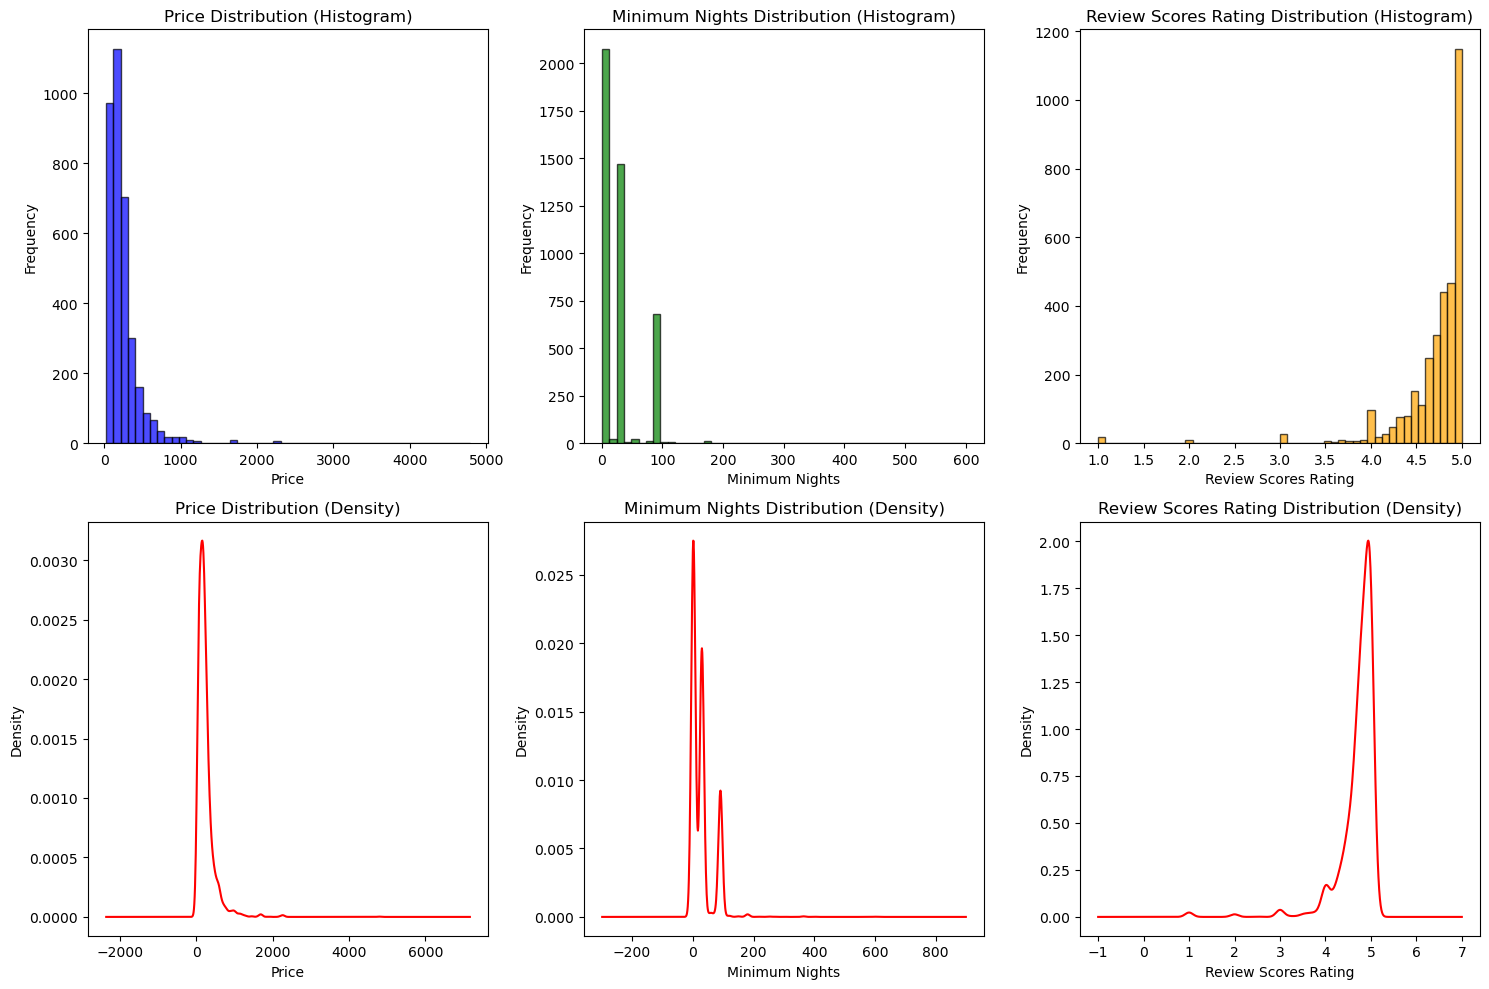

In [12]:
import matplotlib.pyplot as plt

# Plot histograms and density plots for key numerical features
plt.figure(figsize=(15, 10))

# Price histogram
plt.subplot(2, 3, 1)
plt.hist(data['price'], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Price density plot
plt.subplot(2, 3, 4)
data['price'].plot(kind='kde', color='red')
plt.title('Price Distribution (Density)')
plt.xlabel('Price')
plt.ylabel('Density')

# Minimum nights histogram
plt.subplot(2, 3, 2)
plt.hist(data['minimum_nights'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Minimum Nights Distribution (Histogram)')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

# Minimum nights density plot
plt.subplot(2, 3, 5)
data['minimum_nights'].plot(kind='kde', color='red')
plt.title('Minimum Nights Distribution (Density)')
plt.xlabel('Minimum Nights')
plt.ylabel('Density')

# Review scores rating histogram
plt.subplot(2, 3, 3)
plt.hist(data['review_scores_rating'].dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Review Scores Rating Distribution (Histogram)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')

# Review scores rating density plot
plt.subplot(2, 3, 6)
data['review_scores_rating'].dropna().plot(kind='kde', color='red')
plt.title('Review Scores Rating Distribution (Density)')
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()



3. Correlation Analysis Create a correlation matrix to explore relationships between numerical variables such as `price`, `number_of_reviews`, `availability_365`, and `review_scores_rating`. Identify any strong correlations that might be useful for predictive modeling or further investigation.

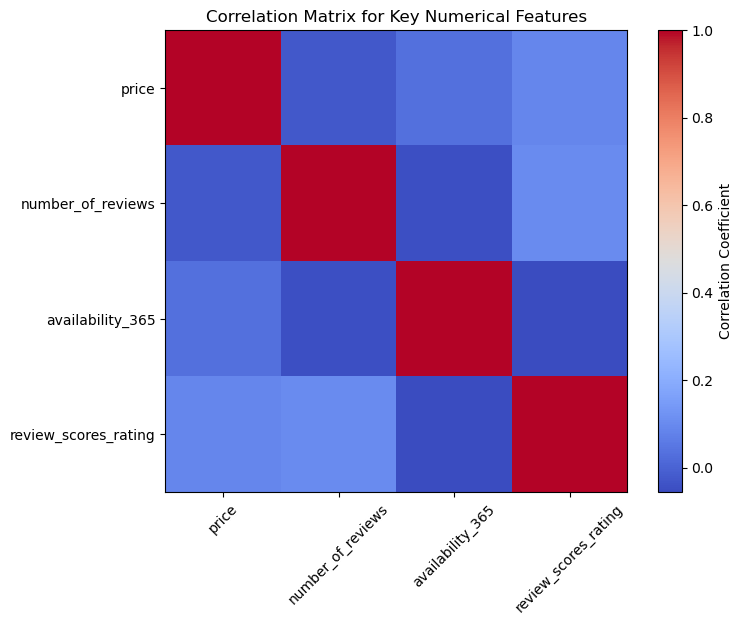

,price,number_of_reviews,availability_365,review_scores_rating
price,1.000000,-0.027068,0.033836,0.088569
number_of_reviews,-0.027068,1.000000,-0.045956,0.100892
availability_365,0.033836,-0.045956,1.000000,-0.056409
review_scores_rating,0.088569,0.100892,-0.056409,1.000000


In [3]:

# Convert 'price' to numerical by removing any non-numeric characters like '$' and ',' and then converting to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Selecting the relevant columns for correlation analysis
correlation_columns = ['price', 'number_of_reviews', 'availability_365', 'review_scores_rating']

# Creating the correlation matrix
correlation_matrix = data[correlation_columns].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_columns)), correlation_columns, rotation=45)
plt.yticks(range(len(correlation_columns)), correlation_columns)
plt.title('Correlation Matrix for Key Numerical Features')
plt.show()

# Displaying the correlation matrix
correlation_matrix

4. Price Analysis
Analyze the distribution of prices across different neighborhoods
(`host_neighbourhood`) or room types (if available). Understand which
neighborhoods have higher or lower average prices and whether certain
neighborhoods are more popular for shortterm or longterm stays.

Average Price by Neighborhood:
host_neighbourhood
Gateway District                        1245.724138
Popponesset                             1242.000000
Cape Neddick                            1194.500000
South Medford                            946.000000
Scottsdale Villa Mirage Resort Condo     799.000000
                                           ...     
Fox Point                                 72.000000
Wellington-Harrington                     70.571429
Boylston Street                           70.000000
Boston Theater District                   66.844444
Waban                                     66.600000
Name: price, Length: 110, dtype: float64

Average Minimum Nights by Neighborhood:
host_neighbourhood
Sun Bay South       91.0
Watertown           91.0
Ward Two            91.0
Wanskuck            91.0
Belmar              91.0
                    ... 
Gateway District     1.0
Haile Plantation     1.0
Hell's Kitchen       1.0
Uplands              1.0
Malden               1.0
Na

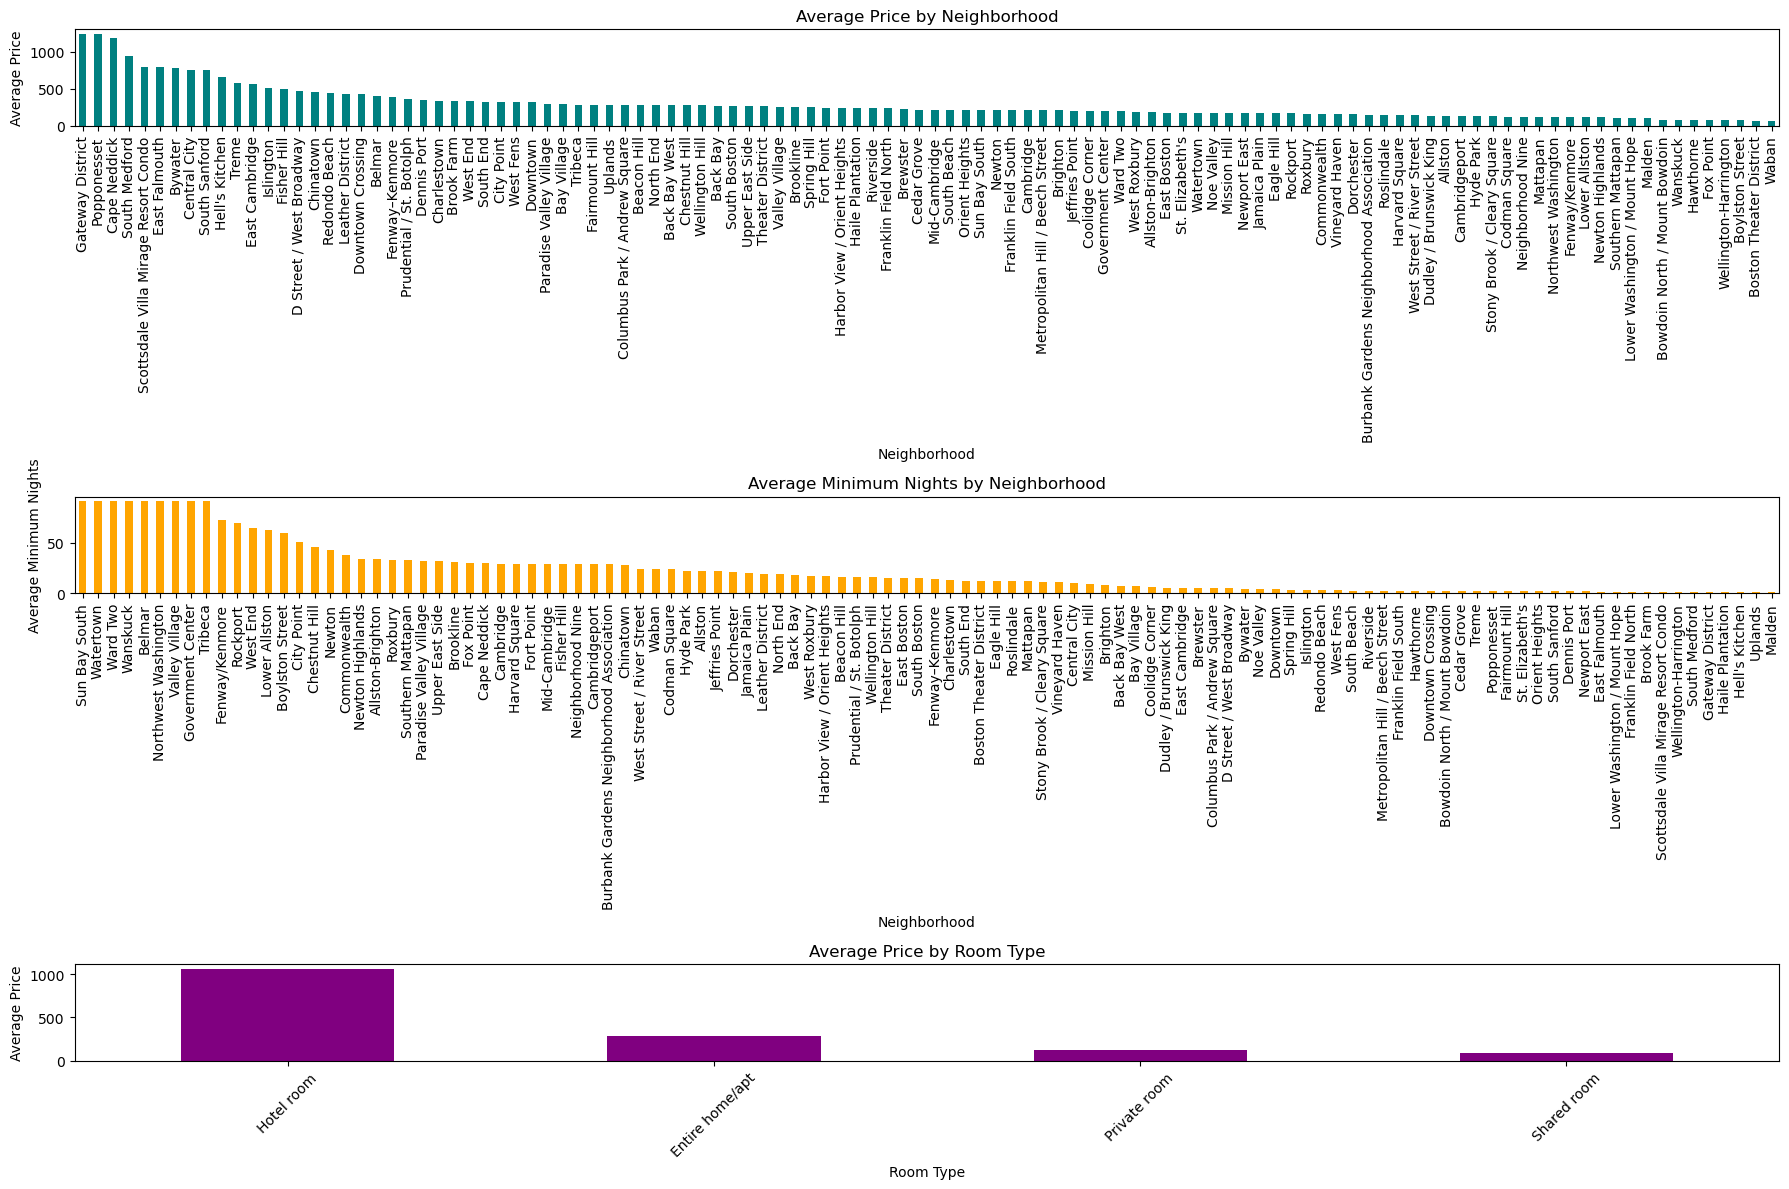

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the listings_df dataset is already loaded and cleaned

# Extracting relevant columns for price analysis: price, host_neighbourhood, room_type, and minimum_nights
price_analysis_columns = ['price', 'host_neighbourhood', 'room_type', 'minimum_nights']

# Dropping any rows with missing values in these columns for accurate analysis
price_analysis_data = data[price_analysis_columns].dropna()

# Calculating average price per neighborhood
avg_price_neighbourhood = price_analysis_data.groupby('host_neighbourhood')['price'].mean().sort_values(ascending=False)

# Calculating average minimum nights per neighborhood (to understand short-term vs long-term stays)
avg_minimum_nights_neighbourhood = price_analysis_data.groupby('host_neighbourhood')['minimum_nights'].mean().sort_values(ascending=False)

# Calculating average price per room type
avg_price_room_type = price_analysis_data.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Displaying the results
print("Average Price by Neighborhood:")
print(avg_price_neighbourhood)

print("\nAverage Minimum Nights by Neighborhood:")
print(avg_minimum_nights_neighbourhood)

print("\nAverage Price by Room Type:")
print(avg_price_room_type)

# Plotting price and minimum nights distributions across neighborhoods and room types
plt.figure(figsize=(18, 12))

# Average price by neighborhood
plt.subplot(3, 1, 1)
avg_price_neighbourhood.plot(kind='bar', color='teal')
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

# Average minimum nights by neighborhood
plt.subplot(3, 1, 2)
avg_minimum_nights_neighbourhood.plot(kind='bar', color='orange')
plt.title('Average Minimum Nights by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Minimum Nights')
plt.xticks(rotation=90)

# Average price by room type
plt.subplot(3, 1, 3)
avg_price_room_type.plot(kind='bar', color='purple')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



5. Neighborhood Comparison Compare the average review_scores_rating across different neighborhoods. Determine if certain neighborhoods have consistently higher ratings, which could indicate better or worse guest experiences.

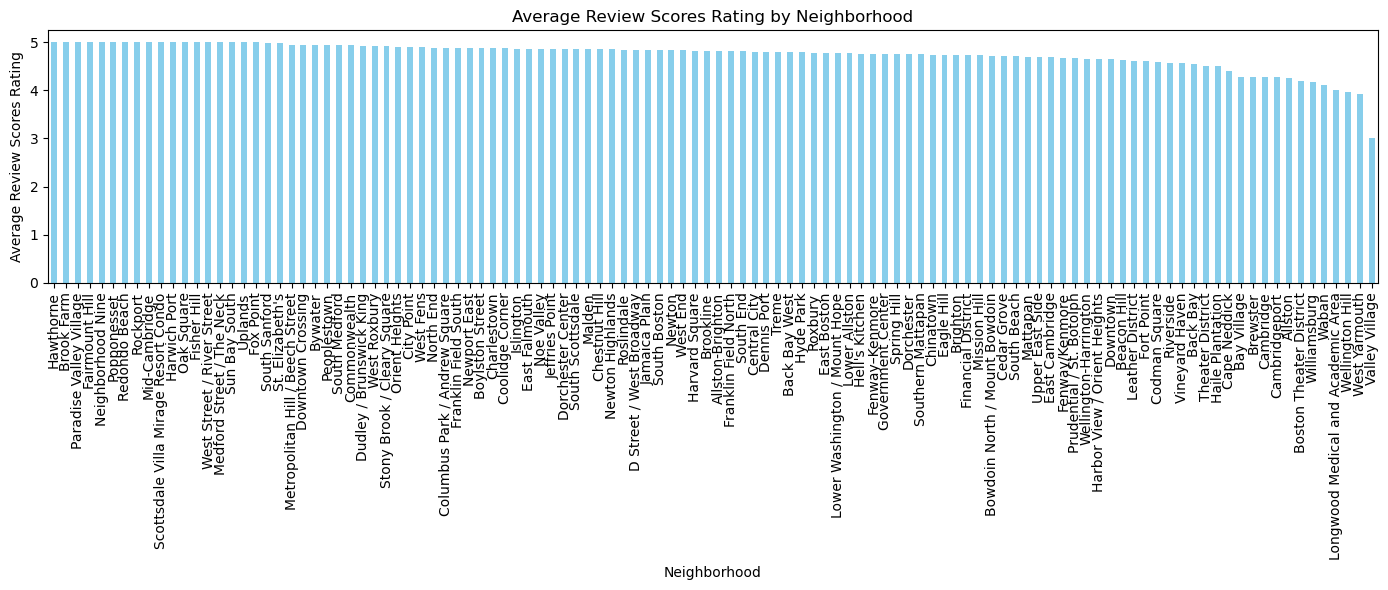

Average Review Scores Rating by Neighborhood:
host_neighbourhood
Hawthorne                             5.000000
Brook Farm                            5.000000
Paradise Valley Village               5.000000
Fairmount Hill                        5.000000
Neighborhood Nine                     5.000000
                                        ...   
Waban                                 4.120000
Longwood Medical and Academic Area    4.000000
Wellington Hill                       3.975714
West Yarmouth                         3.923333
Valley Village                        3.000000
Name: review_scores_rating, Length: 112, dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the listings_df dataset is already loaded and cleaned

# Calculating average review_scores_rating per neighborhood
avg_rating_neighbourhood = data.groupby('host_neighbourhood')['review_scores_rating'].mean().dropna().sort_values(ascending=False)

# Plotting the average review_scores_rating across neighborhoods
plt.figure(figsize=(14, 6))
avg_rating_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Average Review Scores Rating by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Review Scores Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Display the average review scores rating per neighborhood
print("Average Review Scores Rating by Neighborhood:")
print(avg_rating_neighbourhood)


6. Outlier Detection Identify outliers in the dataset, particularly in price, minimum_nights, and review_scores_rating.

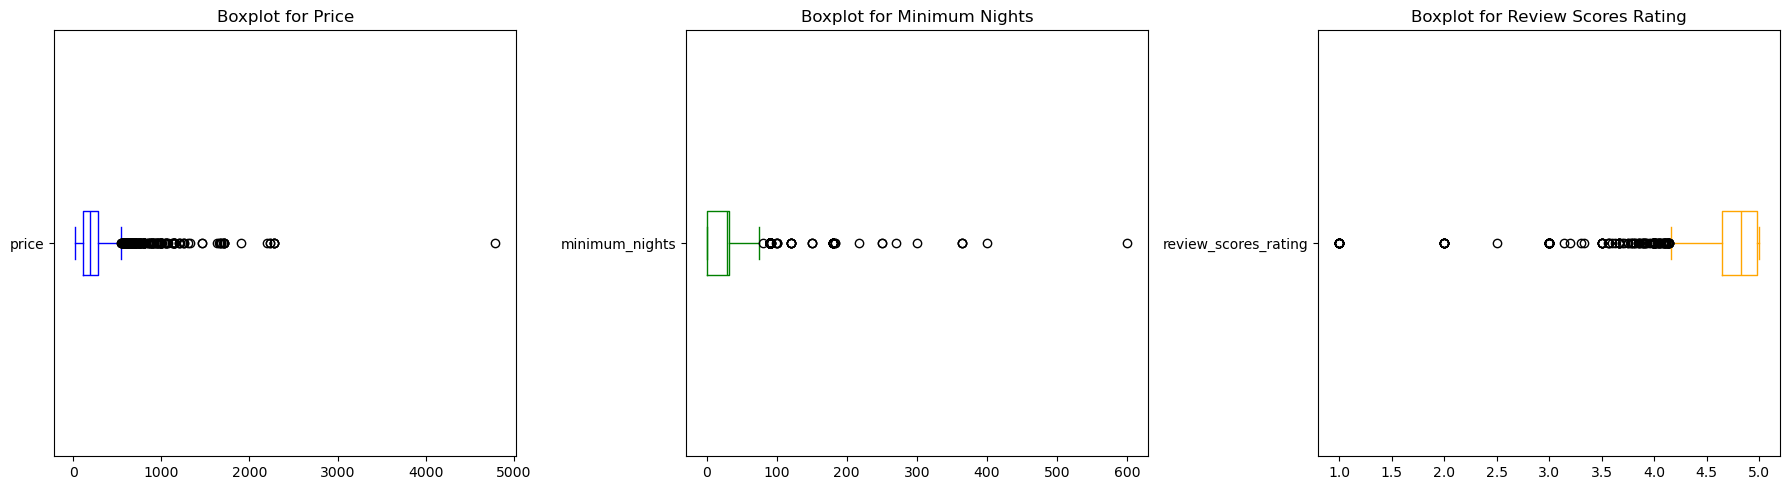

Number of price outliers: 241
       price
61     571.0
86     985.0
100    571.0
112    650.0
187    600.0
...      ...
4285  1000.0
4297   800.0
4301   975.0
4306   560.0
4313   609.0

[241 rows x 1 columns]

Number of minimum nights outliers: 716
      minimum_nights
3                 91
4                 91
14                91
21                91
32                91
...              ...
4238              91
4254              91
4273              91
4283              91
4295              91

[716 rows x 1 columns]

Number of review scores rating outliers: 225
      review_scores_rating
6                     4.00
87                    4.00
166                   4.00
219                   3.71
221                   3.67
...                    ...
4256                  4.00
4262                  1.00
4263                  4.00
4269                  4.00
4275                  1.00

[225 rows x 1 columns]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the listings_df dataset is already loaded and cleaned

# List of columns to check for outliers
outlier_columns = ['price', 'minimum_nights', 'review_scores_rating']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers for each column
outliers_price = detect_outliers_iqr(data, 'price')
outliers_minimum_nights = detect_outliers_iqr(data, 'minimum_nights')
outliers_review_scores = detect_outliers_iqr(data, 'review_scores_rating')

# Visualizing outliers with boxplots
plt.figure(figsize=(18, 5))

# Boxplot for price
plt.subplot(1, 3, 1)
data['price'].plot(kind='box', vert=False, color='blue')
plt.title('Boxplot for Price')

# Boxplot for minimum nights
plt.subplot(1, 3, 2)
data['minimum_nights'].plot(kind='box', vert=False, color='green')
plt.title('Boxplot for Minimum Nights')

# Boxplot for review scores rating
plt.subplot(1, 3, 3)
data['review_scores_rating'].plot(kind='box', vert=False, color='orange')
plt.title('Boxplot for Review Scores Rating')

plt.tight_layout()
plt.show()

# Display the outliers
print(f"Number of price outliers: {len(outliers_price)}")
print(outliers_price[['price']])

print(f"\nNumber of minimum nights outliers: {len(outliers_minimum_nights)}")
print(outliers_minimum_nights[['minimum_nights']])

print(f"\nNumber of review scores rating outliers: {len(outliers_review_scores)}")
print(outliers_review_scores[['review_scores_rating']])


In [25]:
print(f"\nNumber of review scores rating outliers: {len(outliers_review_scores)}")
print(outliers_review_scores[['review_scores_rating']])


Number of review scores rating outliers: 225
      review_scores_rating
6                     4.00
87                    4.00
166                   4.00
219                   3.71
221                   3.67
...                    ...
4256                  4.00
4262                  1.00
4263                  4.00
4269                  4.00
4275                  1.00

[225 rows x 1 columns]


7. Text Length: Create a new feature that measures the length of each review (number of words or characters). Determine if the length of a review correlates with its sentiment or the review scores.

In [33]:
import seaborn as sns

# Load the datasets
reviews_file_path = './data/reviews.csv'  # Replace with your actual file path
listings_file_path = './data/listings.csv'  # Replace with your actual file path
reviews_df = pd.read_csv(reviews_file_path)
listings_df = pd.read_csv(listings_file_path)

# Create a new feature 'review_length' that measures the length of each review in terms of number of words
reviews_df['review_length'] = reviews_df['comments'].apply(lambda x: len(str(x).split()))

# Merge the two datasets based on the listing_id (from reviews) and id (from listings)
merged_df = pd.merge(reviews_df, listings_df, left_on='listing_id', right_on='id', how='inner')

# Calculate the correlation between review length and review scores
correlation = merged_df['review_length'].corr(merged_df['review_scores_value'])

# Print the correlation result
print(f"Correlation between review length and review scores: {correlation}")

Correlation between review length and review scores: 0.03469784853514453


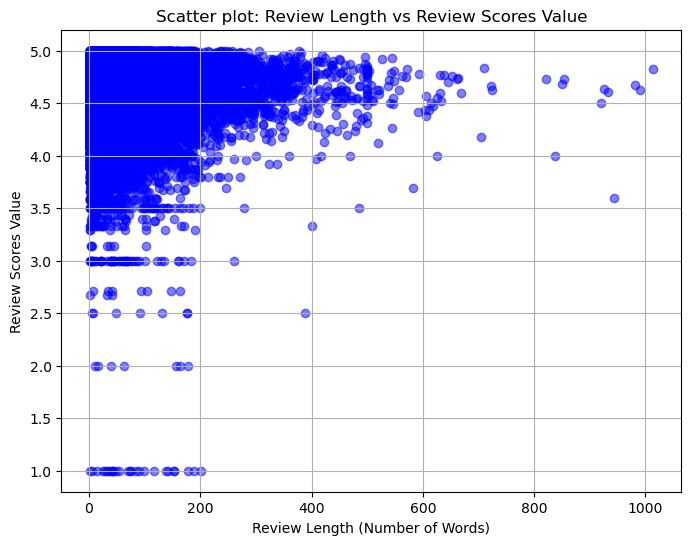

In [32]:

# Create a scatter plot to visualize the relationship between review length and review scores
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['review_length'], merged_df['review_scores_value'], alpha=0.5, color='blue')
plt.title('Scatter plot: Review Length vs Review Scores Value')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Review Scores Value')
plt.grid(True)
plt.show()


8. Keyword Extraction Identify and count the occurrence of specific keywords (e.g., "clean," "comfortable," "noisy") in the reviews. Generate new features based on the presence of these keywords, which might influence guest satisfaction.

In [36]:
# Load the dataset
file_path = './data/reviews.csv'
reviews_df = pd.read_csv(file_path)

keywords = ["clean", "comfortable", "noisy"]

# Convert all text to lowercase for case-insensitive matching and count occurrences of each keyword in each row
for keyword in keywords:
    reviews_df[keyword] = reviews_df['comments'].str.lower().str.count(keyword)

# Display the resulting dataframe with keyword counts
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,clean,comfortable,noisy
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...,0.0,0.0,0.0
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...,0.0,0.0,0.0
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...,0.0,0.0,0.0
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...,1.0,0.0,0.0
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...,0.0,0.0,0.0


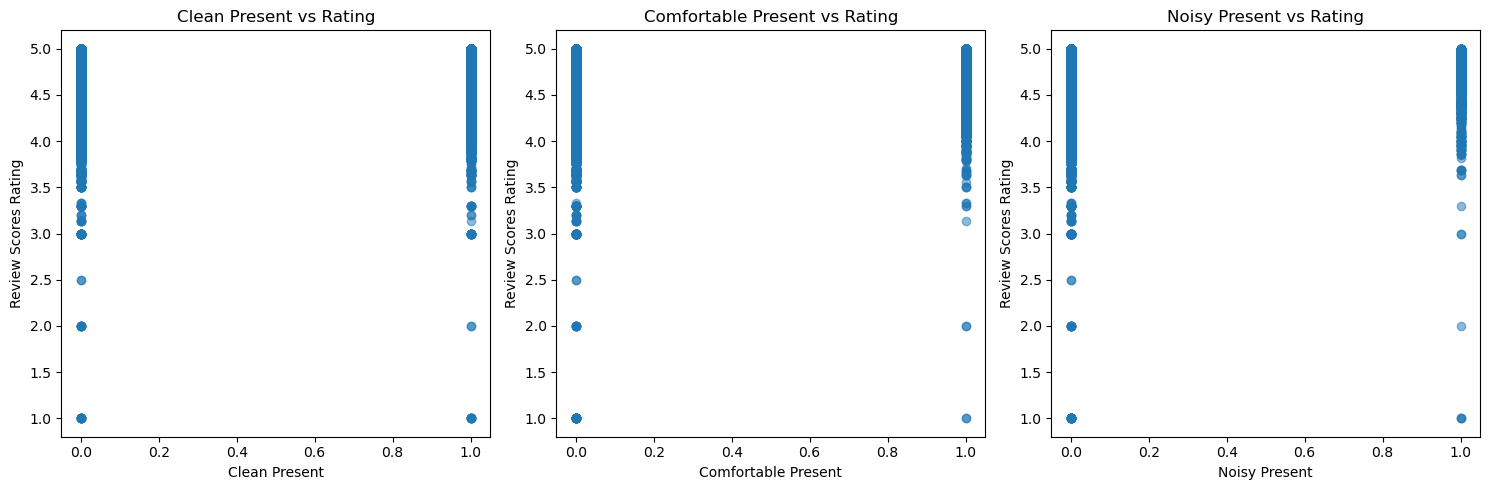

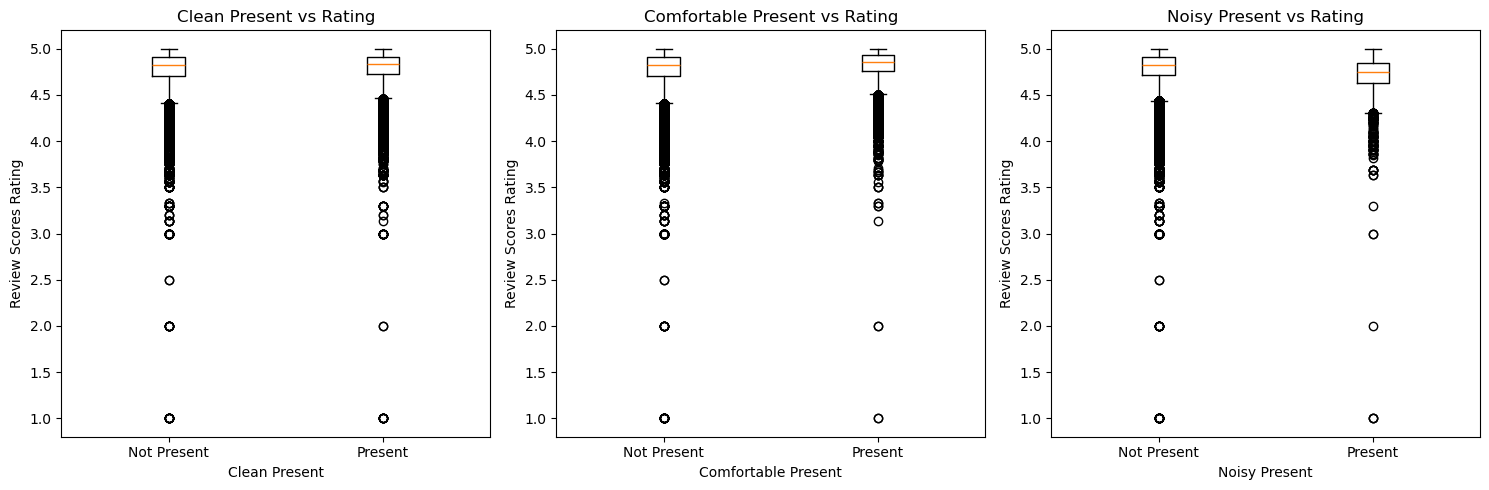

In [41]:
# Scatter plot for each keyword presence vs review_scores_rating
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

keywords_with_present = ['clean_present', 'comfortable_present', 'noisy_present']

for i, keyword in enumerate(keywords_with_present):
    axs[i].scatter(merged_df[keyword], merged_df['review_scores_rating'], alpha=0.5)
    axs[i].set_xlabel(keyword.replace('_', ' ').title())
    axs[i].set_ylabel('Review Scores Rating')
    axs[i].set_title(f'{keyword.replace("_", " ").title()} vs Rating')

# Display the scatter plots
plt.tight_layout()
plt.show()

# Box plot for each keyword presence vs review_scores_rating
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, keyword in enumerate(keywords_with_present):
    axs[i].boxplot([merged_df.loc[merged_df[keyword] == 0, 'review_scores_rating'],
                    merged_df.loc[merged_df[keyword] == 1, 'review_scores_rating']],
                   labels=['Not Present', 'Present'])
    axs[i].set_xlabel(keyword.replace('_', ' ').title())
    axs[i].set_ylabel('Review Scores Rating')
    axs[i].set_title(f'{keyword.replace("_", " ").title()} vs Rating')

# Display the box plots
plt.tight_layout()
plt.show()
